In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5

In [5]:
f(3.0)

20.0

In [6]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [8]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

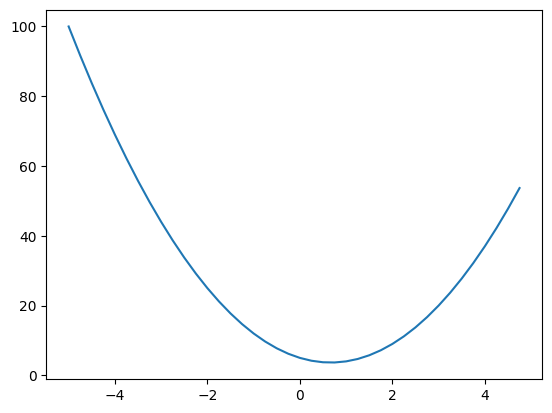

In [10]:
# plotting it

plt.plot(xs, ys)

In [13]:
# calculating derivative

h = 0.00000001
x = 3.0
slop = (f(x + h) - f(x))/ h
slop

14.00000009255109

In [14]:
# what if the x is 2/3

x = 2 / 3
(f(x + h) - f(x))/ h

0.0

it is the lower point in that matplot picture

In [16]:
# goin to a bit more complex one

a = 2.0
b = -3.0
c = 10.0
d = a * b + c
d

4.0

In [19]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a * b + c

print("d1", d1)
print("d2", d2)
print("slope", (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [20]:
# what if we bump the 'b' little bit

h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
b += h
d2 = a * b + c

print("d1", d1)
print("d2", d2)
print("slope", (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [21]:
# what if we bumpt the 'c' little bit

h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c

print("d1", d1)
print("d2", d2)
print("slope", (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [25]:
# create value object

class Value:
    def __init__(self, data) -> None:
        self.data = data
        
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

In [26]:
a = Value(2.0)
b = Value(3.0)
a + b

Value(data=5.0)

In [27]:
a * b

Value(data=6.0)

In [28]:
# a slightly more complex one

class Value:
    def __init__(self, data, _children=()) -> None:
        self.data = data
        self._prev = set(_children)

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other: Value):
        out = Value(self.data + other.data, _children=(self, other))
        return out

    def __mul__(self, other: Value):
        out = Value(self.data * other.data, _children=(self, other))
        return out

In [29]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c # internally it will be like this '(a.__mul__(b)).__add__(c)'
d

Value(data=4.0)

In [30]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [31]:
# now we know the previous value, but don't know the operation created that value


In [32]:
class Value:
    def __init__(self, data, _children=(), _op='') -> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other: Value):
        out = Value(self.data + other.data, _children=(self, other), _op="+")
        return out

    def __mul__(self, other: Value):
        out = Value(self.data * other.data, _children=(self, other), _op="*")
        return out

In [33]:
# same calculations

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c # internally it will be like this '(a.__mul__(b)).__add__(c)'
d

Value(data=4.0)

In [34]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [35]:
d._op

'+'

In [55]:
# let's visualize the things

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

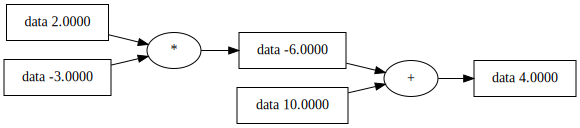

In [ ]:
draw_dot(d)

In [61]:
# adding a label into it

class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other: Value):
        out = Value(self.data + other.data, _children=(self, other), _op="+")
        return out

    def __mul__(self, other: Value):
        out = Value(self.data * other.data, _children=(self, other), _op="*")
        return out

In [62]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b ; e.label = "e"
d = e + c ; d.label = "d"
d

Value(data=4.0)

In [63]:
# slight modification in here

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

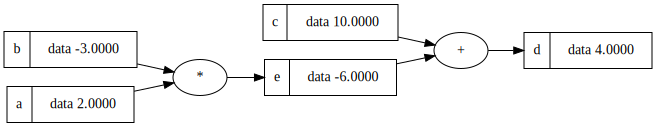

In [64]:
draw_dot(d) # now it have labels

In [65]:
f = Value(-2.0, label='f')
L = d * f ; L.label = "L"
L

Value(data=-8.0)

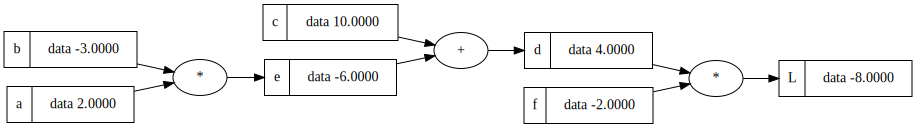

In [66]:
draw_dot(L)

Now we doing back propogation

In [67]:
# for that we need to add grad into the value class

class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other: Value):
        out = Value(self.data + other.data, _children=(self, other), _op="+")
        return out

    def __mul__(self, other: Value):
        out = Value(self.data * other.data, _children=(self, other), _op="*")
        return out

In [68]:
# needed to change the graph function as well

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [69]:
# the math expressions

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b ; e.label = "e"
d = e + c ; d.label = "d"
print("d", d)

f = Value(-2.0, label='f')
L = d * f ; L.label = "L"
print("L", L)

d Value(data=4.0)
L Value(data=-8.0)


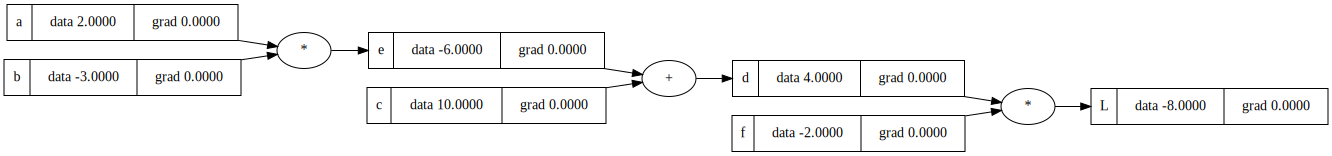

In [70]:
draw_dot(L)

In [73]:
# calculating the gradients manually now

# we are writing this function (lol) for just calculate the grad of 'L'

def lol():
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = "e"
    d = e + c ; d.label = "d"
    f = Value(-2.0, label='f')
    L = d * f ; L.label = "L"
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = "e"
    d = e + c ; d.label = "d"
    f = Value(-2.0, label='f')
    L = d * f ; L.label = "L"
    L2 = L.data + h
    
    print((L2 - L1) / h)

lol()

1.000000000000334


the gradient of L is 1, so we can manually add that 

In [74]:
L.grad = 1.0

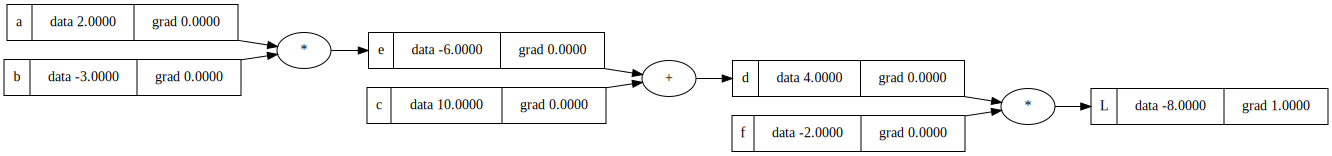

In [75]:
draw_dot(L)

Now we wanna find out the derivative of L with respect to d and f, let's start with d

The real question is what is dL/dd ?????

Let's find out mathematically 

```
(f(x + h) - f(x)) / h ----- common formula
((d+h) * f - d*f) / h
(d*f + h*f - d*f) / h
(h*f) / h
f
```

What is the actual meaning of graidient of d ----> if d change by 1, how much do the L change ?

In [76]:
# the gradient of d will be f, becuase always it will be multiplied by f. And wise versa

d.grad = -2.0
f.grad = 4.0

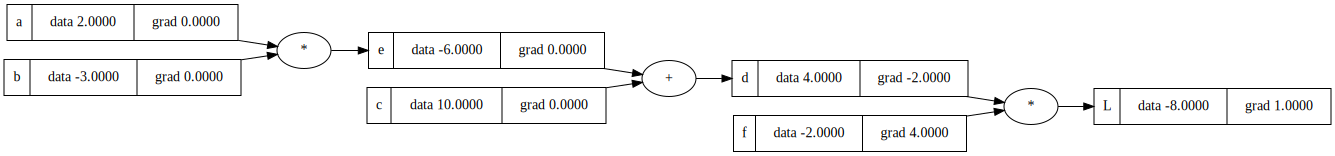

In [77]:
draw_dot(L)

In [78]:
# we can check the derivative of d and f with our 'lol' function

def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = "e"
    d = e + c ; d.label = "d"
    f = Value(-2.0, label='f')
    L = d * f ; L.label = "L"
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = "e"
    d = e + c ; d.label = "d"
    f = Value(-2.0 + h, label='f') # adding h in f , means bumping the f a bit, checking the change in L
    L = d * f ; L.label = "L"
    L2 = L.data
    
    print((L2 - L1) / h)
    
lol()

3.9999999999995595


Yep it is 4, let's check for the d as well

In [81]:
def lol():
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = "e"
    d = e + c ; d.label = "d"
    f = Value(-2.0, label='f')
    L = d * f ; L.label = "L"
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = "e"
    d = e + c ; d.label = "d"
    d += Value(h)                      # adding h with d
    f = Value(-2.0, label='f')
    L = d * f ; L.label = "L"
    L2 = L.data
    
    print((L2 - L1) / h)
lol()

-2.000000000000668


Yep, it is -2

Now, we needed to derive dL / dc . What is the change of c influence the L

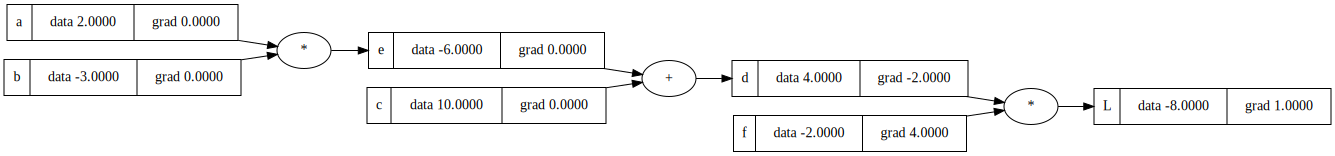

In [83]:
draw_dot(L)

first, we can understand what is dd / dc

```
d = c + e
(f(x + h) - f(x)) / h ----> common formula for derivative

substitute f(x) with d,
((c + h + e) - ( c + e)) / h
(c + h + e - c - e) / h
h / h
1.0
```

> this is the notes for first 40 min in class by andrej karpathy